# Análisis y visualización de datos abiertos con python


El objetivo de este tutorial es analizar dos conjuntos de datos abiertos de la Ciudad de México (Carpetas de investigación PGJ y Víctimas en carpetas de investigación PGJ) usando las herramientas del lenguaje de programación python. El participante aprenderá a usar las biblioteca pandas y otras bibliotecas, para cargar, estructurar, obtener estadísticas básicas y graficar los datos. Además, el participante aplicará metodologías y criterios de análisis y visualización de datos, que le permitan generar conclusiones sobre los conjuntos de datos analizados.


1. [__Introducción a python__](./CP-Introduccion.ipynb)
2. [Obtención de datos](./CP-ObtencionLimpieza.ipynb)
3. [Limpieza de datos](./CP-ObtencionLimpieza.ipynb)
4. [Gráficación básica](./CP-AnalisisGraficas.ipynb)
    1. Tipos de gráficas (lines, bars, scatter, hist)
    2. Elementos de una gráfica (title, axis, etc)
    3. matplotlib
5. [Análisis de datos](./CP-AnalisisGraficas.ipynb)
    1. Estadística básica (count, sum, mean, median, moda, std)
    2. Agrupamiento (groupby, filter, aggregate)
    3. Tablas pivote (pivot_table)
    4. Respondiendo preguntas
6. Extras


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

from os import chdir, getcwd
chdir(getcwd())

In [2]:
with open('data-clean/VictimasPgjCdmx-AltoImpacto.pkl', 'rb') as f:
     df_victimas = load(f)

df_victimas

,delito,categoria_delito,fecha_hechos,Sexo,Edad,TipoPersona,CalidadJuridica,Geopoint
12,Robo a negocio con violencia,Robo a negocio con violencia,2019-05-01 17:25:00,NaN,NaN,Moral,Victima,"19.3683431972,-99.1658033655"
13,Robo a transeunte en via publica sin violencia,Robo a transeunte en vía pública con y sin vio...,2019-04-24 20:20:00,Masculino,26.0,Fisica,Victima y denunciante,"19.4201584349,-99.0700393867"
14,Robo a transeunte en via publica con violencia,Robo a transeunte en vía pública con y sin vio...,2019-05-01 17:30:00,Masculino,19.0,Fisica,Victima y denunciante,"19.4997759162,-99.2025438405"
16,Robo a pasajero a bordo de metro con violencia,Robo a pasajero a bordo del metro con y sin vi...,2019-05-01 16:55:00,Masculino,25.0,Fisica,Victima y denunciante,"19.4280081007,-99.1487454009"
19,Robo a transeunte en via publica sin violencia,Robo a transeunte en vía pública con y sin vio...,2019-05-01 14:30:00,Masculino,40.0,Fisica,Victima y denunciante,"19.311284491,-99.0738306639"
...,...,...,...,...,...,...,...,...
145855,Homicidio por arma de fuego,Homicidio doloso,2019-09-19 23:55:00,Femenino,46.0,Fisica,Lesionado,"19.4493162437,-99.19945177"
145859,Robo de vehiculo de servicio particular sin vi...,Robo de vehículo con y sin violencia,2019-09-19 22:20:00,Masculino,42.0,Fisica,Victima y denunciante,"19.3281515772,-99.1480473403"
145861,Robo a transeunte en via publica con violencia,Robo a transeunte en vía pública con y sin vio...,2019-09-20 01:13:00,Masculino,23.0,Fisica,Victima y denunciante,"19.2800319088,-99.0054473405"
145866,Robo a transeunte en via publica con violencia,Robo a transeunte en vía pública con y sin vio...,2019-09-20 04:30:00,Masculino,45.0,Fisica,Victima y denunciante,"19.3061992087,-98.9656925188"


In [3]:
df_victimas['Edad'].sort_values()

121778    0.0
138164    0.0
51930     0.0
138136    0.0
95943     0.0
         ... 
145779    NaN
145792    NaN
145806    NaN
145817    NaN
145831    NaN
Name: Edad, Length: 32168, dtype: float64

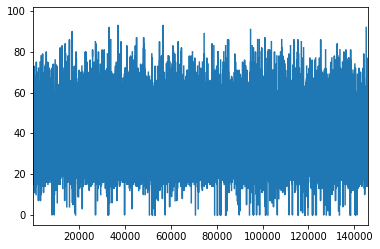

In [4]:
df_victimas['Edad'].plot()

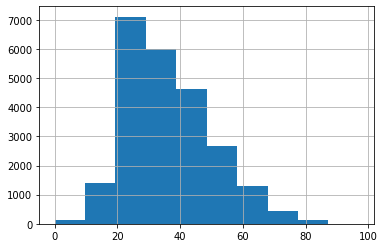

In [5]:
df_victimas['Edad'].hist()

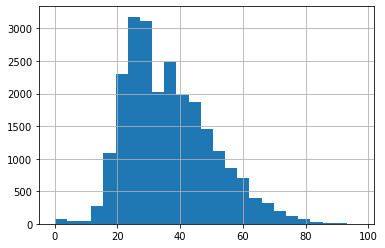

In [6]:
df_victimas['Edad'].hist(bins=25)

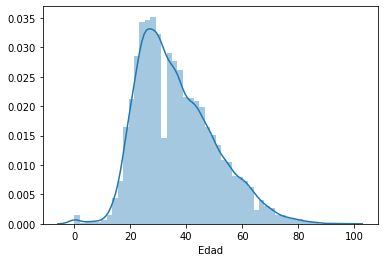

In [7]:
sns.distplot(df_victimas['Edad'].dropna())

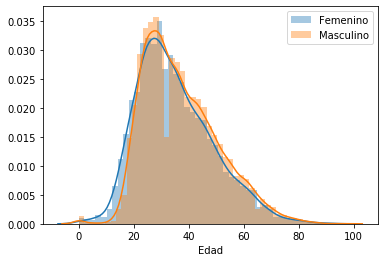

In [9]:
sns.distplot(df_victimas.loc[df_victimas['Sexo']=='Femenino','Edad'].dropna(), label='Femenino')
sns.distplot(df_victimas.loc[df_victimas['Sexo']=='Masculino','Edad'].dropna(), label='Masculino')
plt.legend()

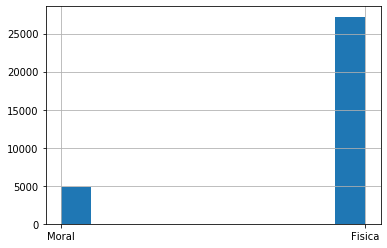

In [10]:
df_victimas['TipoPersona'].hist()

In [ ]:
df_victimas['TipoPersona'].hist()

#### Ejercicio

Escoje una columna y has un histograma usando la documentación de [.hist()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html).

In [11]:
df_victimas.groupby('Sexo').mean()

,Edad
Sexo,
Femenino,35.034898
Masculino,37.063922
No se especifica,0.000000


In [12]:
df_delito_edad = df_victimas.groupby('delito').agg({'Edad':['mean','std','count']})
df_delito_edad

Edad                 
                                                         mean        std count
delito                                                                        
Feminicidio                                         33.738095  17.884534    42
Homicidio por ahorcamiento                          25.500000   0.707107     2
Homicidio por arma blanca                           35.169014  12.468384   142
Homicidio por arma de fuego                         33.779135  12.604151  1064
Homicidio por golpes                                41.029126  16.544329   103
Homicidios intencionales (otros)                    37.623377  14.767531    77
Lesiones intencionales por arma de fuego            33.406452  12.749855  1085
Plagio o secuestro                                  39.560000  17.247490    50
Robo a casa habitacion con violencia                46.651163  16.980933   387
Robo a casa habitacion y vehiculo con violencia     51.682927  15.418234    41
Robo a negocio con violencia                        33.770455  14.014459   440
Robo a negocio y vehiculo con violencia             40.333333  11.360751     6
Robo a oficina pública con violencia                44.500000  13.435029     2
Robo a pasajero a bordo de metro con violencia      33.632911  12.493908   237
Robo a pasajero a bordo de metro sin violencia      33.521241  11.965935  1483
Robo a pasajero a bordo de pesero colectivo con...  35.016743  11.213750   657
Robo a pasajero a bordo de pesero colectivo sin...  35.484375   9.822217    64
Robo a pasajero a bordo de taxi con violencia       35.473913  11.063797   230
Robo a repartidor con violencia                     31.981693   9.267663   437
Robo a repartidor sin violencia                     34.989130   9.849967    92
Robo a repartidor y vehiculo con violencia          36.187500  10.562983    32
Robo a repartidor y vehiculo sin violencia                NaN        NaN     0
Robo a sucursal bancaria (asalto bancario) con ...  39.250000  20.806650     4
Robo a sucursal bancaria (supermercado) con vio...        NaN        NaN     0
Robo a transeunte en via publica (nomina) con v...        NaN        NaN     0
Robo a transeunte en via publica con violencia      33.326383  11.807294  7338
Robo a transeunte en via publica sin violencia      39.807422  15.430210   997
Robo a transeunte saliendo del banco con violencia  42.221805  13.282122   266
Robo a transeunte saliendo del cajero con viole...  41.313725  14.708373   102
Robo a transportista y vehiculo pesado con viol...  37.750000  12.448604    32
Robo a transportista y vehiculo pesado sin viol...  43.500000   0.707107     2
Robo de maquinaria con violencia                    31.750000   9.394147     4
Robo de maquinaria sin violencia                    51.000000   4.242641     2
Robo de motocicleta con violencia                   31.565737   9.723455   502
Robo de motocicleta sin violencia                   32.015132   9.675924   793
Robo de vehiculo de servicio de transporte con ...  38.000000  15.394804     3
Robo de vehiculo de servicio de transporte sin ...  43.833333  12.921558     6
Robo de vehiculo de servicio oficial con violencia  42.750000  15.564382     4
Robo de vehiculo de servicio oficial sin violencia  41.214286  10.154033    14
Robo de vehiculo de servicio particular con vio...  40.970607  12.252139  1599
Robo de vehiculo de servicio particular sin vio...  44.402559  13.505299  3751
Robo de vehiculo de servicio público con violencia  48.395000  12.847436   400
Robo de vehiculo de servicio público sin violencia  48.901130  13.190427   354
Robo durante traslado de valores (nomina) con v...        NaN        NaN     0
Robo en interior de empresa (nomina) con violencia  50.000000   1.414214     2
Violacion                                           24.259603  11.698756   755
Violacion equiparada                                23.860140  11.756689   143
Violacion equiparada por conocido                   22.000000  14.474115    13
Violacion equiparada y robo 

In [13]:
df_delito_edad['Edad']['mean']

delito
Feminicidio                                                  33.738095
Homicidio por ahorcamiento                                   25.500000
Homicidio por arma blanca                                    35.169014
Homicidio por arma de fuego                                  33.779135
Homicidio por golpes                                         41.029126
Homicidios intencionales (otros)                             37.623377
Lesiones intencionales por arma de fuego                     33.406452
Plagio o secuestro                                           39.560000
Robo a casa habitacion con violencia                         46.651163
Robo a casa habitacion y vehiculo con violencia              51.682927
Robo a negocio con violencia                                 33.770455
Robo a negocio y vehiculo con violencia                      40.333333
Robo a oficina pública con violencia                         44.500000
Robo a pasajero a bordo de metro con violencia               33.632911

In [14]:
df_delito_edad.columns = ['Promedio', 'DesviacionEstandar', 'Conteo']
df_delito_edad.head()

,Promedio,DesviacionEstandar,Conteo
delito,,,
Feminicidio,33.738095,17.884534,42
Homicidio por ahorcamiento,25.500000,0.707107,2
Homicidio por arma blanca,35.169014,12.468384,142
Homicidio por arma de fuego,33.779135,12.604151,1064
Homicidio por golpes,41.029126,16.544329,103


In [15]:
df_victimas.groupby('Edad').agg({'delito':lambda x: set(x)})

,delito
Edad,
0.0,"{Feminicidio, Robo a transeunte en via publica..."
1.0,"{Violacion, Homicidio por golpes}"
2.0,"{Violacion, Lesiones intencionales por arma de..."
3.0,"{Violacion equiparada, Lesiones intencionales ..."
4.0,"{Violacion equiparada, Plagio o secuestro, Vio..."
...,...
90.0,{Robo a transeunte en via publica sin violencia}
91.0,{Robo a casa habitacion con violencia}
92.0,"{Robo a casa habitacion con violencia, Robo a ..."


In [16]:
df_delito_sexo = pd.pivot_table(df_victimas, values='fecha_hechos', index=['delito'], columns=['Sexo'], aggfunc='count')
df_delito_sexo

Sexo,Femenino,Masculino,No se especifica
delito,,,
Feminicidio,43.0,1.0,NaN
Homicidio por ahorcamiento,2.0,NaN,NaN
Homicidio por arma blanca,15.0,128.0,NaN
Homicidio por arma de fuego,115.0,976.0,NaN
Homicidio por golpes,5.0,102.0,1.0
Homicidios intencionales (otros),13.0,68.0,NaN
Lesiones intencionales por arma de fuego,157.0,1200.0,NaN
Plagio o secuestro,20.0,37.0,NaN
Robo a casa habitacion con violencia,214.0,238.0,NaN


In [27]:
df_delito_sexo['Total'] = df_delito_sexo.sum(axis=1)
df_delito_sexo = df_delito_sexo.sort_values('Total', ascending=False).fillna(0)
df_delito_sexo

Sexo,Femenino,Masculino,No se especifica,Total
delito,,,,
Robo a transeunte en via publica con violencia,2755.0,5972.0,0.0,8727.0
Robo de vehiculo de servicio particular sin violencia,812.0,3296.0,0.0,4108.0
Robo de vehiculo de servicio particular con violencia,327.0,1477.0,0.0,1804.0
Robo a pasajero a bordo de metro sin violencia,389.0,1259.0,0.0,1648.0
Lesiones intencionales por arma de fuego,157.0,1200.0,0.0,1357.0
Robo a transeunte en via publica sin violencia,580.0,580.0,0.0,1160.0
Homicidio por arma de fuego,115.0,976.0,0.0,1091.0
Robo de motocicleta sin violencia,63.0,811.0,0.0,874.0
Violacion,750.0,60.0,0.0,810.0


In [18]:
pd.pivot_table(df_victimas, values='Edad', index=['delito'], columns=['Sexo'], aggfunc=['count','mean'])

/home/esther/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/pivot.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


count            \
Sexo                                               Femenino Masculino   
Feminicidio                                            41.0       1.0   
Homicidio por ahorcamiento                              2.0       NaN   
Homicidio por arma blanca                              15.0     127.0   
Homicidio por arma de fuego                           109.0     954.0   
Homicidio por golpes                                    5.0      97.0   
Homicidios intencionales (otros)                       12.0      64.0   
Lesiones intencionales por arma de fuego              124.0     959.0   
Plagio o secuestro                                     20.0      30.0   
Robo a casa habitacion con violencia                  192.0     194.0   
Robo a casa habitacion y vehiculo con violencia         7.0      34.0   
Robo a negocio con violencia                          188.0     241.0   
Robo a negocio y vehiculo con violencia                 1.0       5.0   
Robo a oficina pública con violencia                    NaN       2.0   
Robo a pasajero a bordo de metro con violencia         60.0     177.0   
Robo a pasajero a bordo de metro sin violencia        352.0    1128.0   
Robo a pasajero a bordo de pesero colectivo con...    275.0     381.0   
Robo a pasajero a bordo de pesero colectivo sin...     36.0      28.0   
Robo a pasajero a bordo de taxi con violencia          92.0     138.0   
Robo a repartidor con violencia                         6.0     427.0   
Robo a repartidor sin violencia                         1.0      91.0   
Robo a repartidor y vehiculo con violencia              NaN      32.0   
Robo a sucursal bancaria (asalto bancario) con ...      NaN       4.0   
Robo a sucursal bancaria (supermercado) con vio...      NaN       0.0   
Robo a transeunte en via publica con violencia       2323.0    5008.0   
Robo a transeunte en via publica sin violencia        515.0     480.0   
Robo a transeunte saliendo del banco con violencia     88.0     178.0   
Robo a transeunte saliendo del cajero con viole...     34.0      68.0   
Robo a transportista y vehiculo pesado con viol...      0.0      31.0   
Robo a transportista y vehiculo pesado sin viol...      NaN       2.0   
Robo de maquinaria con violencia                        NaN       4.0   
Robo de maquinaria sin violencia                        NaN       2.0   
Robo de motocicleta con violencia                      24.0     478.0   
Robo de motocicleta sin violencia                      52.0     741.0   
Robo de vehiculo de servicio de transporte con ...      NaN       3.0   
Robo de vehiculo de servicio de transporte sin ...      NaN       6.0   
Robo de vehiculo de servicio oficial con violencia      2.0       2.0   
Robo de vehiculo de servicio oficial sin violencia      1.0      13.0   
Robo de vehiculo de servicio particular con vio...    261.0    1338.0   
Robo de vehiculo de servicio particular sin vio...    732.0    3016.0   
Robo de vehiculo de servicio público con violencia      7.0     393.0   
Robo de vehiculo de servicio público sin violencia     32.0     321.0   
Robo en interior de empresa (nomina) con violencia      1.0       1.0   
Violacion                                             705.0      50.0   
Violacion equiparada                                  126.0      17.0   
Violacion equiparada por conocido                      11.0       2.0   
Violacion equiparada y robo de vehiculo                 2.0       NaN   
Violacion tumultuaria                                  20.0       3.0   
Violacion tumultuaria equiparada                        1.0       NaN   
Violacion tumultuaria equiparada por conocido           1.0       NaN   

                                                                     \
Sexo                                               No se especifica   
Feminicidio                                                     NaN   
Homicidio por ahorcamiento                                      NaN   
Homicidio por arma blanca                     

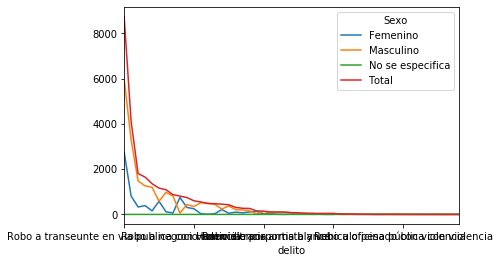

In [37]:
df_delito_sexo.plot()

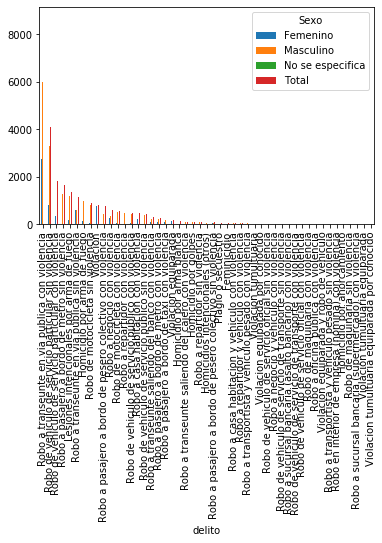

In [28]:
df_delito_sexo.plot(kind='bar')

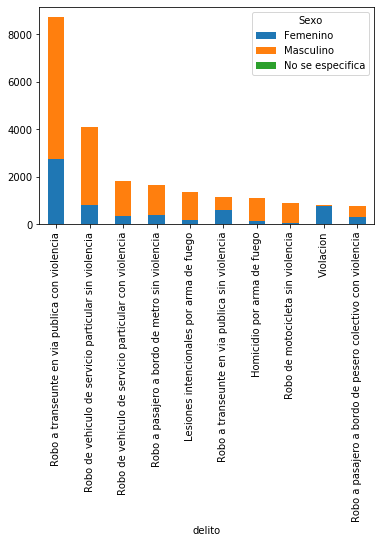

In [30]:
df_delito_sexo.drop('Total',axis=1).head(10).plot(kind='bar', stacked=True)

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

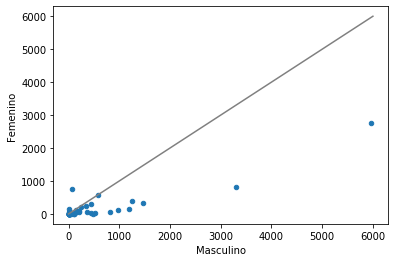

In [53]:
df_delito_sexo.plot(kind='scatter',y='Femenino',x='Masculino')
plt.plot([0,6000],[0,6000], color='grey')

In [66]:
from sklearn.linear_model import LinearRegression
X = df_delito_sexo['Masculino'].values.reshape(-1, 1)
Y = df_delito_sexo['Femenino'].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

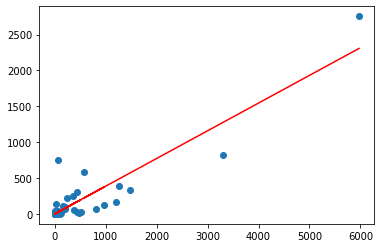

In [67]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [47]:
df_delito_sexo.corr()

Sexo,Femenino,Masculino,No se especifica,Total
Sexo,,,,
Femenino,1.000000,0.906547,-0.051018,0.953348
Masculino,0.906547,1.000000,-0.044376,0.991677
No se especifica,-0.051018,-0.044376,1.000000,-0.047194
Total,0.953348,0.991677,-0.047194,1.000000


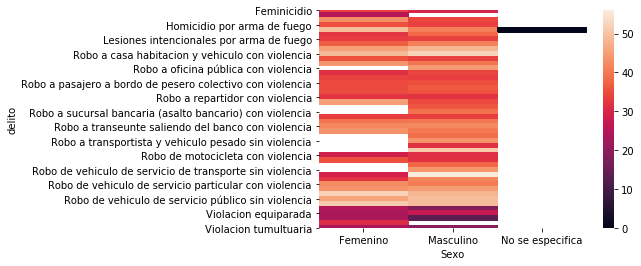

In [41]:
sns.heatmap(pd.pivot_table(df_victimas, values='Edad', index='delito', columns='Sexo', aggfunc='mean'))

Text(0.5, 1, 'Edad por sexo dependiendo del delito')

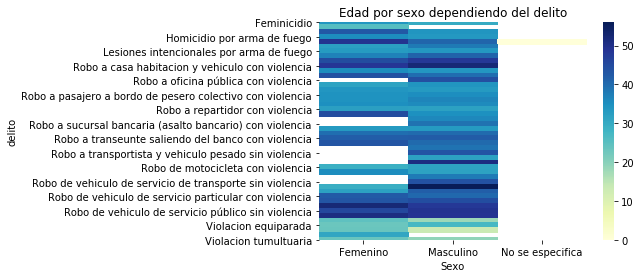

In [45]:
sns.heatmap(pd.pivot_table(df_victimas, values='Edad', index='delito', columns='Sexo', aggfunc='mean'), 
           cmap="YlGnBu")
plt.title('Edad por sexo dependiendo del delito')